In [ ]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

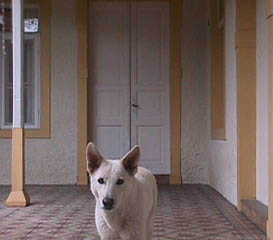

In [ ]:
#abria a imagem
img = cv2.imread('branquinha3.jpg' ,1)
cv2_imshow(img)

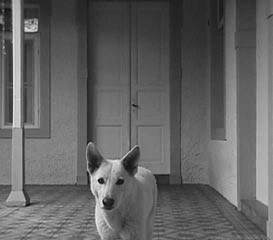

In [ ]:
#aplicando conversão ponderada
#img_grayscale_basic = 0.299*img[ : , : ,0] + 0.587*img[ : , : ,1] + 0.114*img[ : , : ,2]

#cv2
B, G, R = cv2.split(img)
img_grayscale_pondered = 0.299*B+0.587*G+0.114*R

img_grayscale_pondered = np.array(img_grayscale_pondered, dtype=np.uint8)

cv2_imshow(img_grayscale_pondered)

img_grayscale_pondered2 = img_grayscale_pondered.copy()

In [ ]:
def gauss_create(sigma=1, size_x=3, size_y=3):
    '''
    Create normal (gaussian) distribuiton
    '''
    x, y = np.meshgrid(np.linspace(-1,1,size_x), np.linspace(-1,1,size_y))
    calc = 1/((2*np.pi*(sigma**2)))
    exp = np.exp(-(((x**2) + (y**2))/(2*(sigma**2))))

    return exp*calc

def add_padding(img, padding_height, padding_width):
    n, m = img.shape

    padded_img = np.zeros((n + padding_height * 2, m + padding_width * 2))
    padded_img[padding_height : n + padding_height, padding_width : m + padding_width] = img

    return padded_img

def conv2d(img, kernel, padding=True):
    # Get dimensions of the kernel
    k_height, k_width = kernel.shape  # Atribui valor à variável k_height, k_width

    # Get dimensions of the image
    img_height, img_width = img.shape  # Atribui valor à variável img_height, img_width

    # Calculate padding required
    pad_height = k_height // 2  # Atribui valor à variável pad_height
    pad_width = k_width // 2  # Atribui valor à variável pad_width

    # Create a padded version of the image to handle edges
    if padding == True:
        padded_img = add_padding(img, pad_height, pad_width)  # Atribui valor à variável padded_img

    print(padded_img.shape)

    # Initialize an output image with zeros
    output = np.zeros((img_height, img_width), dtype=float)  # Atribui valor à variável output

    # Perform convolution
    for i_img in range(img_height):  # Loop usando i
        for j_img in range(img_width):  # Loop usando j
            for i_kernel in range(k_height):
                for j_kernel in range(k_width):
                    output[i_img, j_img] = output[i_img, j_img] + (padded_img[i_img+i_kernel, j_img+j_kernel] * kernel[i_kernel, j_kernel])  # Atribui valor à variável output[i, j]
            output[i_img, j_img] = int(output[i_img, j_img])

    return np.array(output, dtype=np.uint8)

def add_noise(img):

    # Getting the dimensions of the image
    row , col = img.shape

    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)

        # Color that pixel to white
        img[y_coord][x_coord] = 255

    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)

        # Color that pixel to black
        img[y_coord][x_coord] = 0

    return img

def add_gaussian_noise(image, mean=0, sigma=0.5):
    """
    Aplica ruído gaussiano em uma imagem.

    Parâmetros:
    - image: Imagem de entrada (array numpy).
    - mean: Média do ruído (padrão 0).
    - sigma: Desvio padrão do ruído (padrão 25).

    Retorna:
    - Imagem com ruído aplicado.
    """
    # Gera ruído gaussiano
    gauss = np.random.normal(mean, sigma, image.shape).astype('uint8')

    # Adiciona o ruído à imagem
    noisy_image = cv2.add(image, gauss)

    return noisy_image

def conv2d_sharpening(img, kernel, padding=True):
    # Get dimensions of the kernel
    k_height, k_width = kernel.shape  # Atribui valor à variável k_height, k_width

    # Get dimensions of the image
    img_height, img_width = img.shape  # Atribui valor à variável img_height, img_width

    # Calculate padding required
    pad_height = k_height // 2  # Atribui valor à variável pad_height
    pad_width = k_width // 2  # Atribui valor à variável pad_width

    # Create a padded version of the image to handle edges
    if padding == True:
        padded_img = add_padding(img, pad_height, pad_width)  # Atribui valor à variável padded_img

    #print(padded_img)

    # Initialize an output image with zeros
    output = np.zeros((img_height, img_width), dtype=float)  # Atribui valor à variável output

    # Perform convolution
    for i_img in range(img_height):  # Loop usando i
        for j_img in range(img_width):  # Loop usando j
            #calcula kernel
            for i_kernel in range(k_height):
                for j_kernel in range(k_width):
                    output[i_img, j_img] = output[i_img, j_img] + (padded_img[i_img+i_kernel, j_img+j_kernel] * kernel[i_kernel, j_kernel])  # Atribui valor à variável output[i, j]
            output[i_img, j_img] = int(output[i_img, j_img])

    return np.array(output, dtype=np.float32)


Gauss OpenCV:


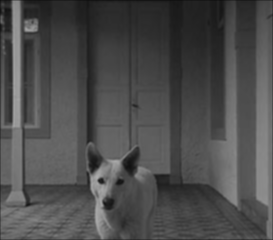

(242, 275)
Gaus Pixel a Pixel:


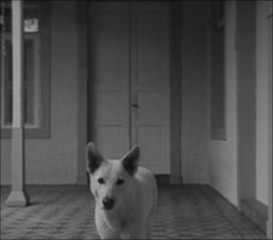

In [ ]:
gaus_3x3 = gauss_create(sigma=1, size_x=3, size_y=3)
mean_3x3 = np.ones((3, 3))/9
#mean_5x5 = np.ones((7, 7))/49 Não estou utilizando

#Convolução pelo OPENCV!!
#conv_opencv = cv2.filter2D(src=img_grayscale_pondered, ddepth=-1, kernel=mean_3x3)
conv_opencv = cv2.filter2D(src=img_grayscale_pondered, ddepth=-1, kernel=gaus_3x3, borderType=cv2.BORDER_CONSTANT)
print("Gauss OpenCV:")
cv2_imshow(conv_opencv)
#print(conv_opencv.shape)

#Convolução pixel a pixel + Gauss!!
GaussianImage = conv2d(img_grayscale_pondered, gaus_3x3)
print("Gaus Pixel a Pixel:")
cv2_imshow(GaussianImage)
#print(GaussianImage.shape)

Imagem com ruído:


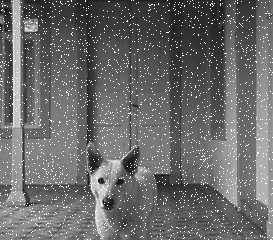

Imagem com ruído salt and pepper:


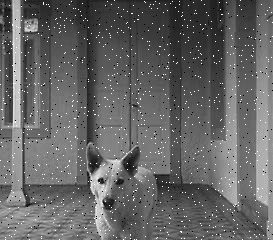

In [ ]:
#Imagem com ruído gaussiano aplicado!!
noisy_image = add_gaussian_noise(img_grayscale_pondered, 0, 0.6)
print("Imagem com ruído:")
cv2_imshow(noisy_image)

#Imagem com ruído salt and pepper aplicado!!
noisy_Image_salt_and_pepper = add_noise(img_grayscale_pondered2)
print("Imagem com ruído salt and pepper:")
cv2_imshow(noisy_Image_salt_and_pepper)

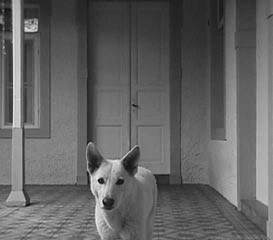

FDA resultado iteração nº0: 


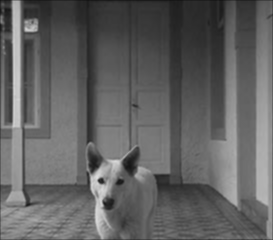



FDA resultado iteração nº1: 


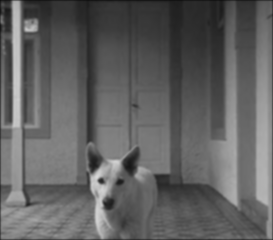



FDA resultado iteração nº2: 


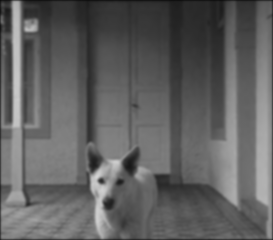



FDA resultado iteração nº3: 


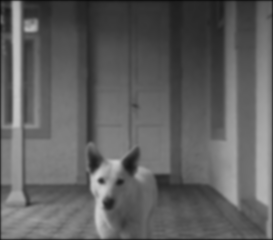



FDA resultado iteração nº4: 


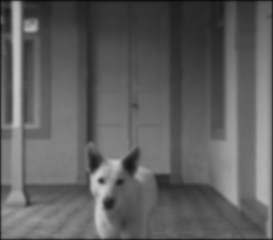



FDA resultado iteração nº5: 


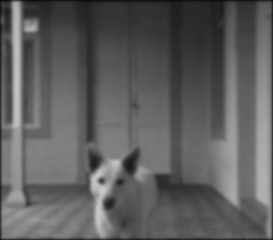



FDA resultado iteração nº6: 


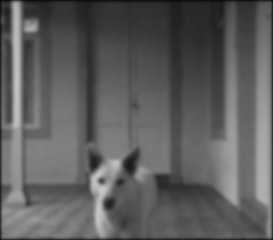



FDA resultado iteração nº7: 


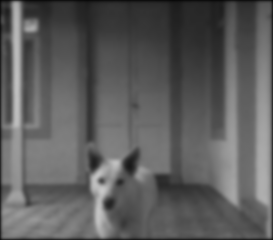



FDA resultado iteração nº8: 


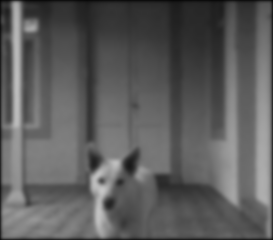



FDA resultado iteração nº9: 


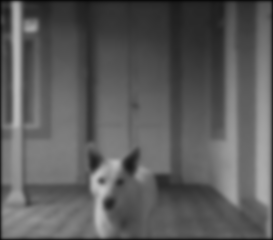



FDA resultado iteração nº10: 


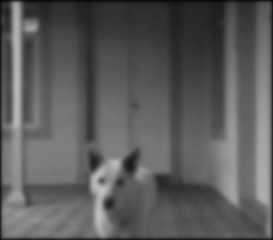



FDA resultado iteração nº11: 


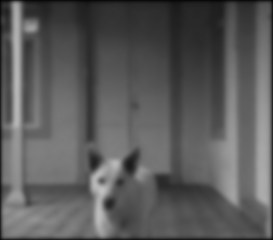



FDA resultado iteração nº12: 


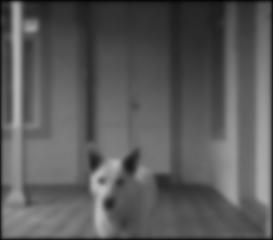



FDA resultado iteração nº13: 


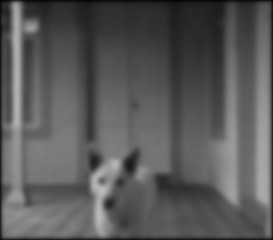



FDA resultado iteração nº14: 


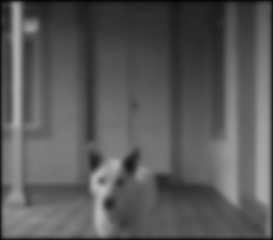



FDA resultado iteração nº15: 


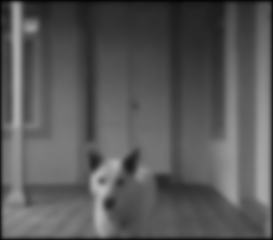



FDA resultado iteração nº16: 


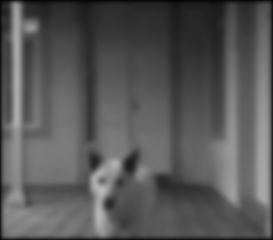



FDA resultado iteração nº17: 


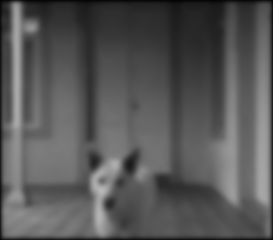



FDA resultado iteração nº18: 


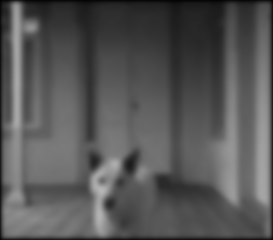



FDA resultado iteração nº19: 


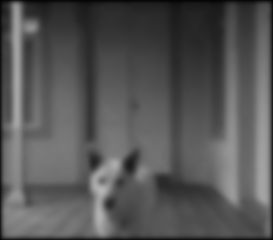



FDA resultado iteração nº0 na imagem com ruído: 


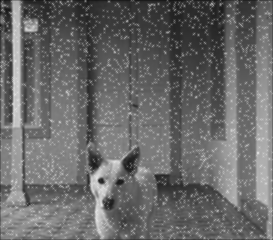



FDA resultado iteração nº1 na imagem com ruído: 


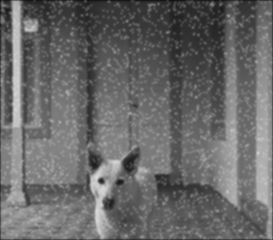



FDA resultado iteração nº2 na imagem com ruído: 


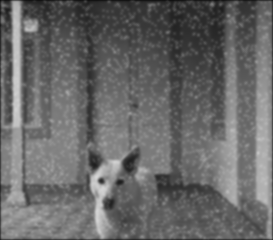



FDA resultado iteração nº3 na imagem com ruído: 


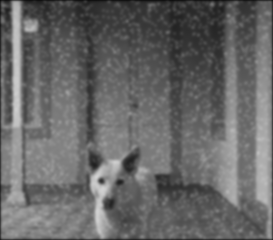



FDA resultado iteração nº4 na imagem com ruído: 


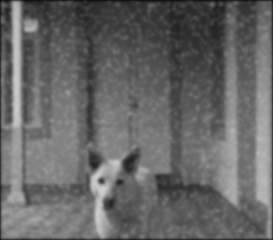



FDA resultado iteração nº5 na imagem com ruído: 


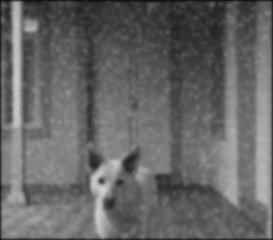



FDA resultado iteração nº6 na imagem com ruído: 


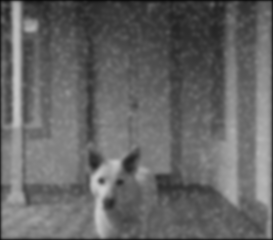



FDA resultado iteração nº7 na imagem com ruído: 


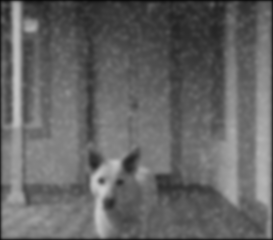



FDA resultado iteração nº8 na imagem com ruído: 


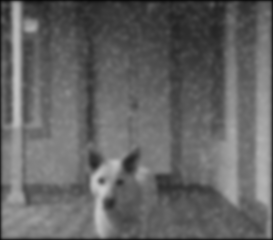



FDA resultado iteração nº9 na imagem com ruído: 


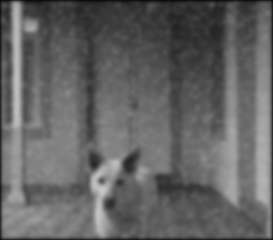



FDA resultado iteração nº10 na imagem com ruído: 


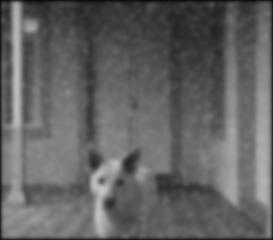



FDA resultado iteração nº11 na imagem com ruído: 


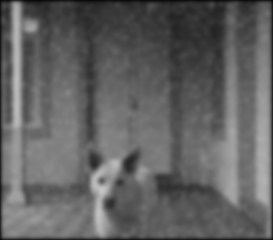



FDA resultado iteração nº12 na imagem com ruído: 


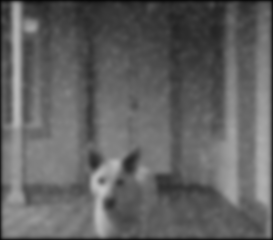



FDA resultado iteração nº13 na imagem com ruído: 


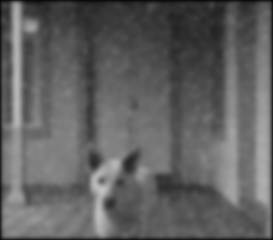



FDA resultado iteração nº14 na imagem com ruído: 


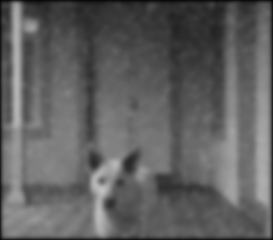



FDA resultado iteração nº15 na imagem com ruído: 


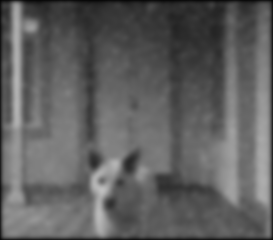



FDA resultado iteração nº16 na imagem com ruído: 


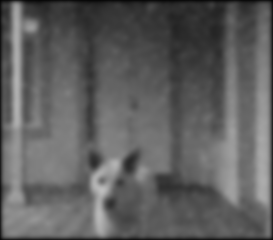



FDA resultado iteração nº17 na imagem com ruído: 


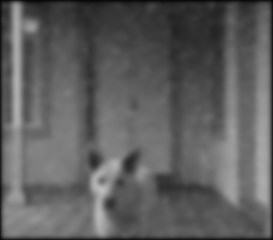



FDA resultado iteração nº18 na imagem com ruído: 


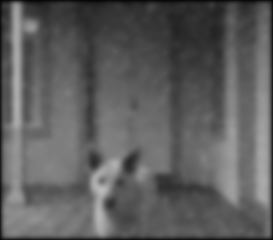



FDA resultado iteração nº19 na imagem com ruído: 


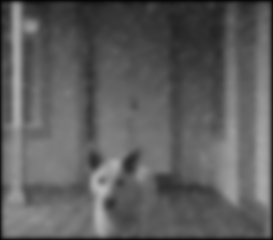

In [ ]:
def dynamic_weight(lbd, tau, alfa, beta):
    """
    Função para calcular os pesos dinâmicos (w) baseados nos parâmetros fornecidos.
    """
    # Cálculo correto do fator da exponencial
    fator = ((abs(alfa-beta))**(1/5)/lbd)/5

    # Cálculo do valor de w com o expoente correto
    w = (1 - np.exp(-8 * tau * np.exp(-fator))) / 8

    return w

def calculate_wC(weights):
    """
    Função para calcular o peso central (wC) com base nos pesos vizinhos.
    """
    return 1 - np.sum(weights)

def create_dynamic_kernel(lbd, tau, x, y):
    """
    Função que cria um kernel dinâmico 3x3 para o pixel na posição (x, y).
    """
    weights = np.zeros(8)  # Vetor para armazenar os 8 pesos vizinhos

    # Calcular os pesos dinâmicos
    weights[0] = dynamic_weight(lbd, tau, x-1, y-1)
    weights[1] = dynamic_weight(lbd, tau, x, y-1)
    weights[2] = dynamic_weight(lbd, tau, x+1, y-1)
    weights[3] = dynamic_weight(lbd, tau, x-1, y)
    weights[4] = dynamic_weight(lbd, tau, x+1, y)
    weights[5] = dynamic_weight(lbd, tau, x-1, y+1)
    weights[6] = dynamic_weight(lbd, tau, x, y+1)
    weights[7] = dynamic_weight(lbd, tau, x+1, y+1)

    # Calcular o peso central (wC)
    wC = calculate_wC(weights)

    # Criar o kernel 3x3 dinâmico
    kernel = np.array([
        [weights[0], weights[1], weights[2]],
        [weights[3], wC,       weights[4]],
        [weights[5], weights[6], weights[7]]
    ])

    return kernel

def conv2d_dynamic_kernel(img, lbd, tau, padding=True):
    """
    Função para realizar a convolução usando um kernel dinâmico.
    """
    img_height, img_width = img.shape  # Dimensões da imagem

    # Padding opcional para tratar as bordas
    if padding:
        padded_img = np.pad(img, pad_width=1, mode='constant', constant_values=0)
    else:
        padded_img = img

    # Inicializar a imagem de saída
    output = np.zeros((img_height, img_width), dtype=float)

    # Percorrer a imagem pixel a pixel
    for i_img in range(img_height):
        for j_img in range(img_width):
            # Gerar o kernel dinâmico para o pixel atual
            kernel = create_dynamic_kernel(lbd, tau, i_img, j_img)

            # Aplicar a convolução (multiplicação e soma)
            region = padded_img[i_img:i_img+3, j_img:j_img+3]
            output[i_img, j_img] = np.sum(region * kernel)

    return np.array(output, dtype=np.uint8)

lbd, tau = 15,  0.15 #15 e 0.15 e 1 e .25
iteracoes = 20
cv2_imshow(img_grayscale_pondered)
#Imagem com FDA aplicado na imagem sem ruído!!!
for i in range(iteracoes):
    if i == 0:
        fdaImage = conv2d_dynamic_kernel(img_grayscale_pondered, lbd, tau)
    else:
        fdaImage = conv2d_dynamic_kernel(fdaImage, lbd, tau)
    print(f"FDA resultado iteração nº{i}: ")
    cv2_imshow(fdaImage)
    print("\n")


#Imagem com FDA aplicado na imagem com ruído!!!
for i in range(iteracoes):
    if i == 0:
        fda_in_noisy_image = conv2d_dynamic_kernel(noisy_image, lbd, tau)
        #fda_in_noisy_image = conv2d_dynamic_kernel(noisy_Image_salt_and_pepper, lbd, tau)
    else:
        fda_in_noisy_image = conv2d_dynamic_kernel(fda_in_noisy_image, lbd, tau)
        #fda_in_noisy_image = conv2d_dynamic_kernel(noisy_Image_salt_and_pepper, lbd, tau)
    print(f"FDA resultado iteração nº{i} na imagem com ruído: ")
    cv2_imshow(fda_in_noisy_image)
    print("\n")



In [ ]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])

	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return np.sqrt(err)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Calcular o MSE e o PSNR fda x gaussian
mse_value_fda = mse(img_grayscale_pondered, fdaImage)
mse_value_gaussian = mse(img_grayscale_pondered, GaussianImage)

psnr_value_fda = PSNR(img_grayscale_pondered, fdaImage)
#cv2_imshow(fdaImage)
psnr_value_gaussian = PSNR(img_grayscale_pondered, GaussianImage)
#cv2_imshow(GaussianImage)

#Calcular o MSE e o PSNR da imagem com ruído e com fda aplicado na imagem com ruído
mse_value_noisy_image = mse(img_grayscale_pondered, noisy_image)
mse_value_fda_in_noisy_image = mse(img_grayscale_pondered, fda_in_noisy_image)

psnr_value_noisy_image = PSNR(img_grayscale_pondered, noisy_image)
#cv2_imshow(noisy_image)
psnr_value_fda_in_noisy_image = PSNR(img_grayscale_pondered, fda_in_noisy_image)
#cv2_imshow(fda_in_noisy_image)
psnr_value_in_noisy_image_salt_and_pepper = PSNR(img_grayscale_pondered, noisy_Image_salt_and_pepper)
#cv2_imshow(noisy_Image_salt_and_pepper)

print(f"Gaussian X FDA {iteracoes}x\n")
print(f"Erro Quadrático Médio (MSE) Filtro FDA: {mse_value_fda}")
print(f"Erro Quadrático Médio (MSE) Filtro Gauss: {mse_value_gaussian}")
print(f"Razão Pico-Sinal/Ruído (PSNR) Filtro FDA: {psnr_value_fda} dB")
print(f"Razão Pico-Sinal/Ruído (PSNR) Filtro Gauss: {psnr_value_gaussian} dB")

print(f"\nImagem com ruído X Imagem com ruído + FDA {iteracoes}x\n")
print(f"Erro Quadrático Médio (MSE) na imagem com ruído: {mse_value_noisy_image}")
print(f"Erro Quadrático Médio (MSE) FDA {iteracoes}x na Imagem com ruído: {mse_value_fda_in_noisy_image}")
print(f"Razão Pico-Sinal/Ruído (PSNR) Na imagem com ruído: {psnr_value_noisy_image} dB")
print(f"Razão Pico-Sinal/Ruído (PSNR) FDA {iteracoes}x na Imagem com ruído: {psnr_value_fda_in_noisy_image} dB")
#print(f"Razão Pico-Sinal/Ruído (PSNR) na Imagem com ruído + Salt and Pepper: {psnr_value_in_noisy_image_salt_and_pepper} dB")
#pnsr_convcv = PSNR(img_grayscale_pondered, conv_opencv)
#print(f"Razão Pico-Sinal/Ruído (PSNR) Filtro OpenCV: {pnsr_convcv} dB")


Gaussian X FDA 3x

Erro Quadrático Médio (MSE) Filtro FDA: 10.246961192237125
Erro Quadrático Médio (MSE) Filtro Gauss: 24.868412547103656
Razão Pico-Sinal/Ruído (PSNR) Filtro FDA: 33.480976692954385 dB
Razão Pico-Sinal/Ruído (PSNR) Filtro Gauss: 27.477497822654023 dB

Imagem com ruído X Imagem com ruído + FDA 3x

Erro Quadrático Médio (MSE) na imagem com ruído: 35.13980863342387
Erro Quadrático Médio (MSE) FDA 3x na Imagem com ruído: 13.996313071994338
Razão Pico-Sinal/Ruído (PSNR) Na imagem com ruído: 41.09884810174051 dB
Razão Pico-Sinal/Ruído (PSNR) FDA 3x na Imagem com ruído: 30.477560977059003 dB


MSE - Indica o erro padronizado:
* Quanto maior pior, pois mais próximo do zero, mais iguais as imagens são

PSNR - razão entre a potência máxima de um
sinal e a potência máxima do sinal do ruído:
* Quanto maior melhor, considerável bom db >= 20dB

Sobel Imagem Original


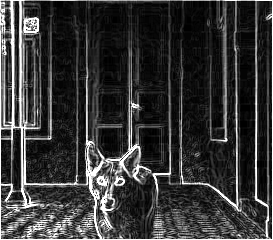


Sobel Imagem c/ Filtro Gaussiano


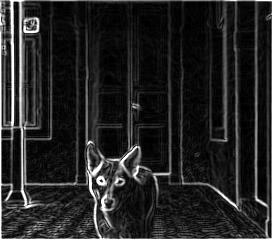


Sobel Imagem c/ Filtro de difusão anisotrópica


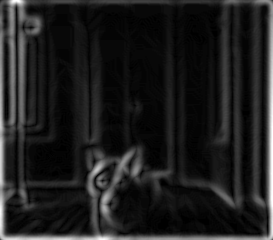


Sobel Imagem c/ ruído


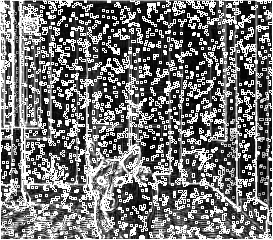


Sobel Imagem c/ ruído e FDA


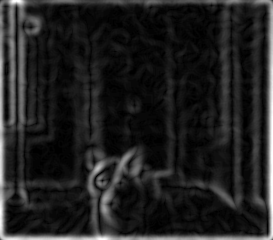

In [ ]:
kernel_sobel_1 = np.array(([-1,-2,-1],[0,0,0],[1,2,1]))
kernel_sobel_2 = np.array(([-1,0,1],[-2,0,2],[-1,0,1]))
img_sobel_1 = conv2d_sharpening(img_grayscale_pondered, kernel_sobel_1)
img_sobel_2 = conv2d_sharpening(img_grayscale_pondered, kernel_sobel_2)
img_sobel_original = np.abs(img_sobel_1)+np.abs(img_sobel_2)
print("Sobel Imagem Original")
cv2_imshow(img_sobel_original)

img_sobel_1 = conv2d_sharpening(GaussianImage, kernel_sobel_1)
img_sobel_2 = conv2d_sharpening(GaussianImage, kernel_sobel_2)
img_sobel_gaussian = np.abs(img_sobel_1)+np.abs(img_sobel_2)
print("\nSobel Imagem c/ Filtro Gaussiano")
cv2_imshow(img_sobel_gaussian)

img_sobel_1 = conv2d_sharpening(fdaImage, kernel_sobel_1)
img_sobel_2 = conv2d_sharpening(fdaImage, kernel_sobel_2)
img_sobel_fda = np.abs(img_sobel_1)+np.abs(img_sobel_2)
print("\nSobel Imagem c/ Filtro de difusão anisotrópica")
cv2_imshow(img_sobel_fda)

img_sobel_1 = conv2d_sharpening(noisy_image, kernel_sobel_1)
img_sobel_2 = conv2d_sharpening(noisy_image, kernel_sobel_2)
image_sobel_noisy_image = np.abs(img_sobel_1)+np.abs(img_sobel_2)
print("\nSobel Imagem c/ ruído")
cv2_imshow(image_sobel_noisy_image)

img_sobel_1 = conv2d_sharpening(fda_in_noisy_image, kernel_sobel_1)
img_sobel_2 = conv2d_sharpening(fda_in_noisy_image, kernel_sobel_2)
image_sobel_fda_in_noisy_image = np.abs(img_sobel_1)+np.abs(img_sobel_2)
print("\nSobel Imagem c/ ruído e FDA")
cv2_imshow(image_sobel_fda_in_noisy_image)

𝜏 = 0.25 e 𝜆 = 1.0 e 3 iterações -> Sobel ficou pior porém métricas melhores quando comparadas com
𝜏 = 0.15 e 𝜆 = 15 e 3 iterações

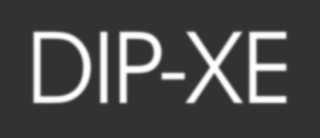

(140, 322)


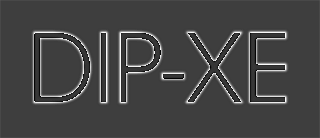

(140, 322)


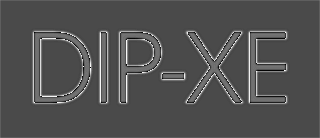

(140, 322)


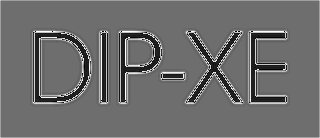


Sobel Imagem unsharped mask


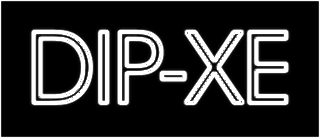


Sobel Imagem highboost filtering k = 2


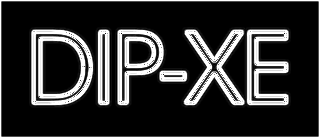


Sobel Imagem highboost filtering k = 5


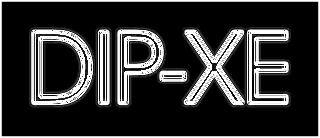

In [ ]:
def unsharp_masking(img, kernel, k):
    # Passo 1: Aplicar o borramento gaussiano
    img_blurred = conv2d(img, kernel)

    # Passo 2: Subtrair a imagem borrada da original para criar a máscara
    mask = img - img_blurred

    # Passo 3: Somar a máscara à imagem original
    sharpened_img = img + mask*k

    return sharpened_img

#abria a imagem
DIPXE = cv2.imread('dip-xe.png')
#cv2
B, G, R = cv2.split(DIPXE)
DIPXE = 0.299*B+0.587*G+0.114*R
DIPXE = np.array(DIPXE, dtype=np.uint8)
cv2_imshow(DIPXE)

gaussian_kernel = gauss_create(sigma=1, size_x=3, size_y=3)
# Aplicar Unsharp Masking
img_unsharpk1 = unsharp_masking(DIPXE, gaussian_kernel, 1)
cv2_imshow(img_unsharpk1)
img_unsharpk2 = unsharp_masking(DIPXE, gaussian_kernel, 2)
cv2_imshow(img_unsharpk2)
img_unsharpk5 = unsharp_masking(DIPXE, gaussian_kernel, 5)
cv2_imshow(img_unsharpk5)

img_sobel_1 = conv2d_sharpening(img_unsharpk1, kernel_sobel_1)
img_sobel_2 = conv2d_sharpening(img_unsharpk1, kernel_sobel_2)
img_sobel_img_unsharpk1 = np.abs(img_sobel_1)+np.abs(img_sobel_2)
print("\nSobel Imagem unsharped mask")
cv2_imshow(img_sobel_img_unsharpk1)

img_sobel_1 = conv2d_sharpening(img_unsharpk2, kernel_sobel_1)
img_sobel_2 = conv2d_sharpening(img_unsharpk2, kernel_sobel_2)
img_sobel_img_unsharpk2 = np.abs(img_sobel_1)+np.abs(img_sobel_2)
print("\nSobel Imagem highboost filtering k = 2")
cv2_imshow(img_sobel_img_unsharpk2)

img_sobel_1 = conv2d_sharpening(img_unsharpk5, kernel_sobel_1)
img_sobel_2 = conv2d_sharpening(img_unsharpk5, kernel_sobel_2)
img_sobel_img_unsharpk5 = np.abs(img_sobel_1)+np.abs(img_sobel_2)
print("\nSobel Imagem highboost filtering k = 5")
cv2_imshow(img_sobel_img_unsharpk5)